<a href="https://colab.research.google.com/github/lotrmay/TensorFlow_Learning/blob/master/bc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(15958, 98)
(2817, 98)
Epoch 1/1000
250/250 [==============================] - 2s 4ms/step - loss: 0.6938 - accuracy: 0.5064 - val_loss: 0.6876 - val_accuracy: 0.5552
Epoch 2/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.6855 - accuracy: 0.5579 - val_loss: 0.6833 - val_accuracy: 0.5754
Epoch 3/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.6815 - accuracy: 0.5666 - val_loss: 0.6799 - val_accuracy: 0.5726
Epoch 4/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.6776 - accuracy: 0.5713 - val_loss: 0.6773 - val_accuracy: 0.5733
Epoch 5/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.6758 - accuracy: 0.5732 - val_loss: 0.6745 - val_accuracy: 0.5953
Epoch 6/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.6729 - accuracy: 0.5897 - val_loss: 0.6720 - val_accuracy: 0.5921
Epoch 7/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.6687 - accuracy: 0.5978 - val_loss:

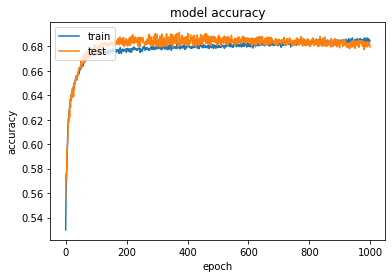

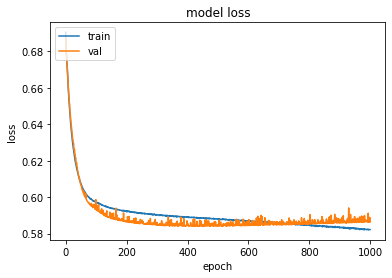

In [69]:
%tensorflow_version 2.x
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import numpy as np #better arrays in python, lepší práce s multidimenzionálními poli
import pandas as pd #data analytics tool, lepší manipulace s daty, dokáže například cut outnout column
import matplotlib.pyplot as plt #vizualizace tabulek a grafů
from IPython.display import clear_output #jen pro tenhle notebook
from six.moves import urllib
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt
import numpy
import keras
CSV_COLUMN_NAMES=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','Match_link','Result','team_one_name','team_two_name']
RESULTS=['0','1']


train=pd.read_csv('/content/pokus.csv',sep=";",names=CSV_COLUMN_NAMES,error_bad_lines=False,header=None)
#train_y=train.pop('Result')
#test_y=test.pop('Result')
train.pop('Match_link')
train.pop('team_one_name')
train.pop('team_two_name')
target_column = ['Result'] 
predictors = list(set(list(train.columns))-set(target_column))
scaler = MinMaxScaler(feature_range=(0.01, 0.99))
norm = StandardScaler()
train[predictors]=norm.fit_transform(train[predictors])
train[predictors] = scaler.fit_transform(train[predictors])


#train[predictors] = train[predictors]/train[predictors].max()

X = train[predictors].values
y = train[target_column].values
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)#32 je ok a skončil jsem na 32
print(X_train.shape); print(X_test.shape)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
count_classes = y_test.shape[1]


model = Sequential()
model.add(Dense(98, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.02), #keras.optimizers.SGD(learning_rate=0.01)
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
#change number of hidden layers and change the learning rate up to 0.9
#adadelta-lr 0.015 98 30 15 5 2 rs9 testsize 0.15 64batchsize  Accuracy on test data: 0.690095841884613% 

#adadelta-lr 0.02 98 35 15 2 rs17 testsize 0.15 64batchsize 0.15 test rate Accuracy on test data: 0.6890308856964111% 
#record accuracy má Adadelta(0.01), categorical_crossentropy 98,50,2 1000 epochs a 32 batch size
#record accuracy má adadelta(0.01) 86 random state 32 batch size a 1000 epochs  test accuracy: 0.674478
#adadelta 
#binary_crossentropy
#categorical_crossentropy
# categorical_hinge 0.677
# hinge 0.667
# MeanAbsoluteError 0.654, ale do 1500 epochs to bylo nad 0.67
# MeanAbsolutePercentageError 0.6814 nevyskytuje se snížení po 1500 epochs jako minule
history = model.fit(X_train, y_train, epochs=1000,batch_size=64,validation_data=(X_test, y_test))

pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)



scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [70]:
Xnew=np.array([[1.73,2.04,17,16,0.65,0.66,0.476,0.496,1.09,0.65,0.71,1.05,76.1,0.69,0.54,1.07,4.4,1.08,0.67,0.71,1.1,77.4,0.68,0.52,1.02,5.3,1.06,0.63,0.73,0.95,74.0,0.64,0.38,1.02,6.7,1.04,0.65,0.71,1.01,70.2,0.67,0.43,1.04,3.3,1.0675,0.65,0.715,1.0275,74.425,0.67,0.46749999999999997,1.0375,4.925,1.16,0.63,0.73,1.1,82.7,0.73,0.5,1.16,6.7,1.14,0.55,0.73,1.1,69.2,0.71,0.35,1.30,2.9,1.1,0.63,0.71,1.08,76.8,0.69,0.53,1.09,5.5,1.09,0.68,0.71,1.1,78.3,0.7,0.5,1.04,5.3,1.07,0.6,0.72,0.95,72.6,0.67,0.53,1.11,5.8],
                [2.4,1.5,115,57,0.71,0.34,0.5,0.484,1.26,0.58,0.76,1.21,87.8,0.8,0.53,1.38,5.6,1.12,0.71,0.72,1.21,81.6,0.76,0.5,1.08,6.8,1.1,0.66,0.77,1.08,69.8,0.7,0.53,1.06,3.3,1.04,0.68,0.78,0.87,72.9,0.66,0.47,0.97,6.2,1.04,0.66,0.73,1.14,67.5,0.58,0.29,0.87,2.1,0.99,0.62,0.69,0.86,67.7,0.61,0.28,0.99,2.6,0.93,0.7,0.68,0.84,69.6,0.63,0.52,0.90,5.3,0.92,0.68,0.66,0.89,64.9,0.58,0.53,0.85,5.0,0.9466666666666667,0.6666666666666666,0.6766666666666667,0.8633333333333333,67.4,0.6066666666666666,0.44333333333333336,0.9133333333333334,4.3,0.9466666666666667,0.6666666666666666,0.6766666666666667,0.8633333333333333,67.4,0.6066666666666666,0.44333333333333336,0.9133333333333334,4.3],
                [3.75,1.25,38,15,0.49,0.57,0.648,0.582,1.09,0.69,0.69,1.13,80.6,0.71,0.53,1.03,4.9,1.04,0.64,0.7,1.02,70.3,0.65,0.25,1.03,4.6,1.02,0.68,0.69,1.0,71.6,0.69,0.56,1.01,2.1,0.95,0.69,0.68,0.92,69.3,0.62,0.53,0.90,3.9,0.92,0.69,0.66,0.9,69.3,0.6,0.47,0.86,4.9,1.26,0.66,0.74,1.34,89.6,0.8,0.56,1.22,6.3,1.1,0.56,0.74,1.0,68.9,0.66,0.3,1.18,4.1,1.09,0.61,0.72,0.98,74.5,0.71,0.52,1.15,5.0,1.07,0.68,0.72,1.08,73.9,0.69,0.63,1.02,4.6,0.97,0.65,0.71,0.82,68.7,0.59,0.57,0.91,6.0],
                [2.08,1.68,55,25,0.53,0.53,0.486,0.534,1.23,0.58,0.75,1.24,77.9,0.77,0.25,1.34,5.4,1.07,0.67,0.68,1.14,76.9,0.7,0.51,1.05,7.1,1.05,0.67,0.72,1.04,71.1,0.66,0.63,0.99,4.9,1.02,0.65,0.72,0.92,70.3,0.65,0.52,1.00,4.9,0.93,0.68,0.7,0.81,67.5,0.56,0.53,0.82,5.9,1.14,0.63,0.7,1.2,76.3,0.74,0.3,1.16,5.7,1.1,0.61,0.73,0.98,75.8,0.68,0.43,1.10,7.6,1.06,0.69,0.69,1.12,76.2,0.67,0.58,0.96,7.3,1.02,0.67,0.69,1.03,72.6,0.64,0.61,0.96,5.9,1.01,0.64,0.7,0.93,69.5,0.63,0.54,0.99,4.5],
                [1.25,3.4,13,71,0.5,0.62,0.456,0.5,1.22,0.62,0.76,1.18,82.6,0.78,0.5,1.26,6.8,1.16,0.67,0.69,1.31,82.3,0.74,0.23,1.10,3.6,1.16,0.66,0.73,1.07,85.9,0.76,0.46,1.15,5.1,1.02,0.66,0.69,0.99,72.3,0.64,0.48,0.96,4.5,0.9,0.68,0.69,0.83,61.1,0.54,0.54,0.80,2.5,1.26,0.68,0.75,1.35,89.8,0.82,0.54,1.20,4.2,1.13,0.64,0.71,1.16,76.2,0.69,0.3,1.08,3.7,1.03,0.68,0.75,0.82,73.1,0.64,0.58,0.95,2.0,0.94,0.73,0.7,0.95,64.1,0.6,0.6,0.83,2.7,0.93,0.66,0.68,0.78,64.1,0.62,0.6,0.94,2.0],
               [1.55,2.35,1,2,0.83,0.64,0.571,0.483,1.26,0.59,0.74,1.32,82.4,0.77,0.52,1.30,5.3,1.24,0.49,0.77,1.13,74.3,0.73,0.25,1.48,3.8,1.14,0.62,0.73,1.12,77.2,0.7,0.48,1.12,5.7,1.09,0.7,0.69,1.24,77.9,0.68,0.48,0.98,6.1,0.96,0.56,0.76,0.66,58.2,0.52,0.51,0.93,5.1,1.3,0.59,0.76,1.34,86.5,0.83,0.37,1.42,1.7,1.13,0.64,0.72,1.12,82.0,0.71,0.5,1.11,4.9,1.1,0.57,0.72,1.03,70.4,0.69,0.68,1.22,4.1,1.03,0.58,0.74,0.85,68.6,0.6,0.49,1.04,4.9,0.89,0.67,0.69,0.82,62.6,0.52,0.37,0.77,4.1],
               [1.46,2.5,21,32,0.73,0.64,0.541,0.45,1.19,0.62,0.71,1.22,79.2,0.77,0.28,1.26,3.2,1.18,0.59,0.74,1.15,77.9,0.73,0.56,1.24,3.9,1.13,0.62,0.72,1.11,76.8,0.72,0.58,1.16,3.8,1.11,0.66,0.72,1.13,76.8,0.69,0.59,1.05,5.2,1.0,0.67,0.7,0.97,73.3,0.62,0.5,0.91,6.7,1.27,0.58,0.78,1.2,86.5,0.78,0.49,1.34,8.1,1.18,0.6,0.73,1.19,78.6,0.75,0.22,1.24,3.9,1.1,0.67,0.73,1.08,77.7,0.67,0.43,1.00,5.3,1.09,0.62,0.75,1.01,72.0,0.66,0.51,1.06,5.7,1.04,0.65,0.71,1.07,69.8,0.65,0.45,1.00,3.8]
               ])
Xnew=norm.fit_transform(Xnew)
Xnew = scaler.fit_transform(Xnew)

ynew=(model.predict([Xnew]))
#ynew=(model.predict_classes([Xnew]))
print(ynew)

Consider rewriting this model with the Functional API.
[[0.29591173 0.70408833]
 [0.3538122  0.6461878 ]
 [0.1296964  0.8703036 ]
 [0.8548866  0.14511338]
 [0.86501086 0.1349891 ]
 [0.17986633 0.8201337 ]
 [0.8655814  0.13441864]]
